In [ ]:
import tensorflow
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# Preprocess the data
train_images = train_images.reshape((60000, 28, 28,1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28,1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)



11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


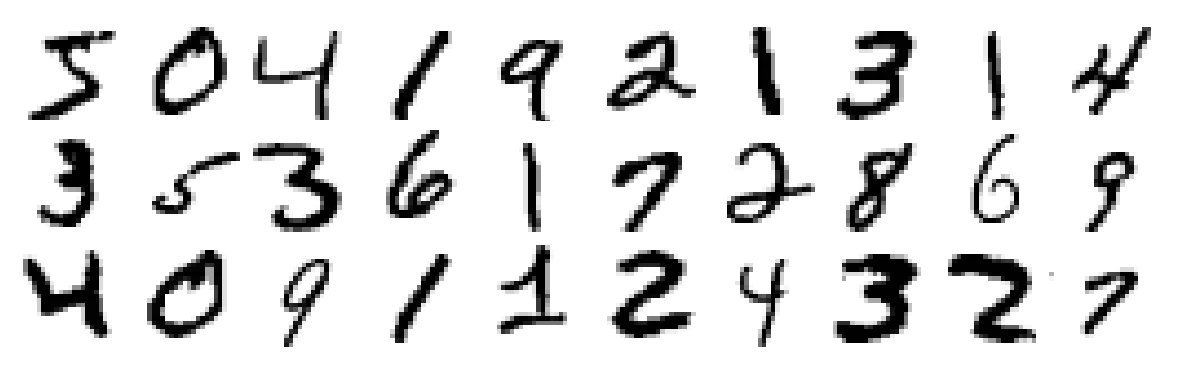

In [ ]:
import matplotlib.pyplot as plt
# PREVIEW IMAGES
plt.figure(figsize=(15,4.5))
for i in range(30):
    plt.subplot(3, 10, i+1)
    plt.imshow(train_images[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

In [ ]:
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

In [ ]:
# Create the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/10
938/938 [==============================] - 24s 24ms/step - loss: 0.2894 - accuracy: 0.9194 - val_loss: 0.1172 - val_accuracy: 0.9686
Epoch 2/10
938/938 [==============================] - 21s 22ms/step - loss: 0.0966 - accuracy: 0.9733 - val_loss: 0.0731 - val_accuracy: 0.9790
Epoch 3/10
938/938 [==============================] - 24s 26ms/step - loss: 0.0686 - accuracy: 0.9802 - val_loss: 0.0613 - val_accuracy: 0.9805
Epoch 4/10
938/938 [==============================] - 21s 22ms/step - loss: 0.0556 - accuracy: 0.9840 - val_loss: 0.0552 - val_accuracy: 0.9823
Epoch 5/10
938/938 [==============================] - 21s 23ms/step - loss: 0.0481 - accuracy: 0.9859 - val_loss: 0.0509 - val_accuracy: 0.9835
Epoch 6/10
938/938 [==============================] - 20s 21ms/step - loss: 0.0417 - accuracy: 0.9879 - val_loss: 0.0570 - val_accuracy: 0.9822
Epoch 7/10
938/938 [==============================] - 21s 23ms/step - loss: 0.0374 - accuracy: 0.9885 - val_loss: 0.0513 - val_accuracy:

FASHION MNIST DATASET

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/10
900/900 [==============================] - 28s 30ms/step - loss: 0.3706 - accuracy: 0.8614 - val_loss: 0.2374 - val_accuracy: 0.9181
Epoch 2/10
900/900 [==============================] - 26s 29ms/step - loss: 0.2215 - accuracy: 0.9209 - val_loss: 0.2049 - val_accuracy: 0.9279
Epoch 3/10
900/900 [==============================] - 25s 28ms/step - loss: 0.1879 - accuracy: 0.9334 - val_loss: 0.1918 - val_accuracy: 0.9337
Epoch 4/10
900/900 [==============================] - 30s 33ms/step - loss: 0.1668 - accuracy: 0.9401 - val_loss: 0.1743 - val_accuracy: 0.9386
Epoch 5/10
900/900 [==============================] - 26s 29ms/step - loss: 0.1506 - accuracy: 0.9457 - val_loss: 0.1705 - val_accuracy: 0.9403
Epoch 6/10
900/900 [==============================] - 25s 28ms/step - loss: 0.1328 - accuracy: 0.9518 - val_loss: 0.1636 - val_accuracy: 0.9431
Epoch 7/10
900/900 [==============================] - 27s 29ms/step - los

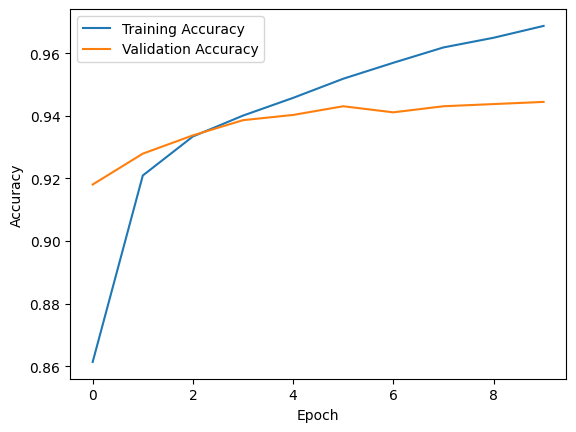

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Keep only the selected classes (0 to 5)
selected_classes = [0, 1, 2, 3, 4, 5]
train_mask = np.isin(train_labels, selected_classes)
test_mask = np.isin(test_labels, selected_classes)

train_images = train_images[train_mask]
train_labels = train_labels[train_mask]
test_images = test_images[test_mask]
test_labels = test_labels[test_mask]

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshape images to (28, 28, 1) for compatibility with Conv2D layer
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Convert labels to categorical
train_labels = to_categorical(train_labels, num_classes=len(selected_classes))
test_labels = to_categorical(test_labels, num_classes=len(selected_classes))

# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(selected_classes), activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import tensorflow
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the Fashion MNIST dataset
(train_images1, train_labels1), (test_images1, test_labels1) = fashion_mnist.load_data()
train_images1 = train_images1.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images1 = test_images1.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels1 = to_categorical(train_labels1)
test_labels1= to_categorical(test_labels1)

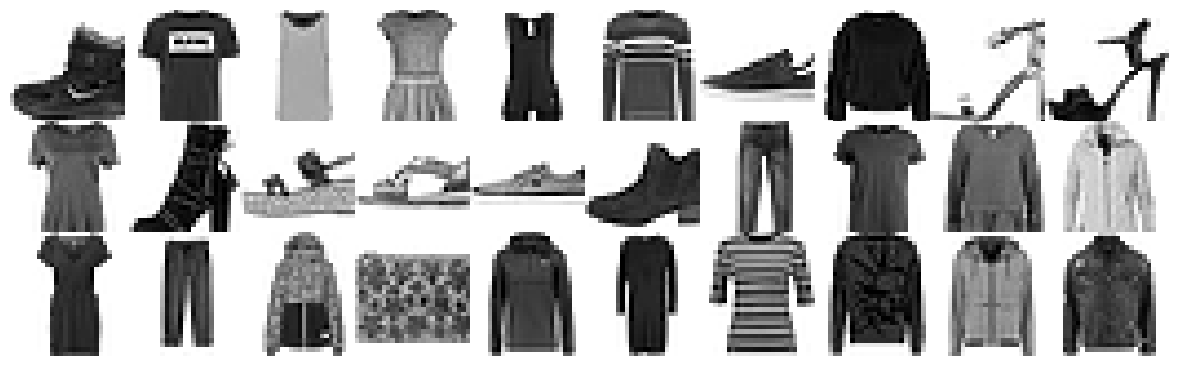

In [ ]:
import matplotlib.pyplot as plt
# PREVIEW IMAGES
plt.figure(figsize=(15,4.5))
for i in range(30):
    plt.subplot(3, 10, i+1)
    plt.imshow(train_images1[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()


In [ ]:
# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images1, train_labels1, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images1, test_labels1)
print('Test accuracy:', test_acc)

Epoch 1/5
750/750 [==============================] - 41s 53ms/step - loss: 0.5957 - accuracy: 0.7798 - val_loss: 0.4243 - val_accuracy: 0.8462
Epoch 2/5
750/750 [==============================] - 39s 52ms/step - loss: 0.3736 - accuracy: 0.8638 - val_loss: 0.3531 - val_accuracy: 0.8733
Epoch 3/5
750/750 [==============================] - 40s 53ms/step - loss: 0.3191 - accuracy: 0.8847 - val_loss: 0.3108 - val_accuracy: 0.8875
Epoch 4/5
750/750 [==============================] - 40s 53ms/step - loss: 0.2844 - accuracy: 0.8972 - val_loss: 0.3106 - val_accuracy: 0.8838
Epoch 5/5
313/313 [==============================] - 2s 8ms/step - loss: 0.3023 - accuracy: 0.8923
Test accuracy: 0.892300009727478


DOG VS CAT DATASET

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

# Upload the Kaggle API key
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!mv kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets list

ref                                                      title                                       size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------  -----------------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedrcat/daigt-v2-train-dataset                          DAIGT V2 Train Dataset                      29MB  2023-11-16 01:38:36           4489        337  1.0              
hummaamqaasim/jobs-in-data                               Jobs and Salaries in Data Science           76KB  2023-12-25 20:03:32           7376        144  1.0              
nelgiriyewithana/new-york-housing-market                 New York Housing Market                    271KB  2024-01-06 16:41:00           2345         71  1.0              
nelgiriyewithana/apple-quality                           Apple Quality                              170KB  2024-01-11 14:31:07           159

In [ ]:
!kaggle datasets download -d shaunthesheep/microsoft-catsvsdogs-dataset

100% 786M/788M [00:14<00:00, 78.8MB/s]
100% 788M/788M [00:14<00:00, 55.6MB/s]


In [ ]:
!mkdir microsoft-catsvsdogs-dataset
!mv microsoft-catsvsdogs-dataset.zip  microsoft-catsvsdogs-dataset

In [ ]:
%cd microsoft-catsvsdogs-dataset/

/content/microsoft-catsvsdogs-dataset


In [ ]:
!unzip microsoft-catsvsdogs-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/550.jpg   
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

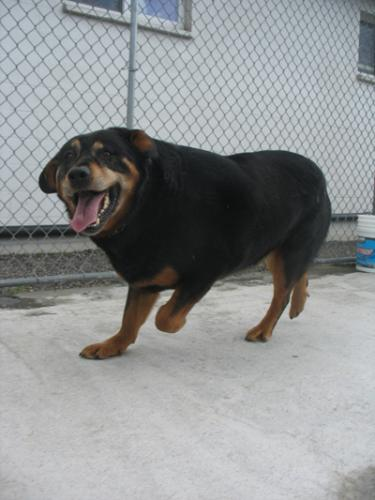

In [ ]:
img=cv2.imread('/content/microsoft-catsvsdogs-dataset/PetImages/Dog/6000.jpg')
cv2_imshow(img)

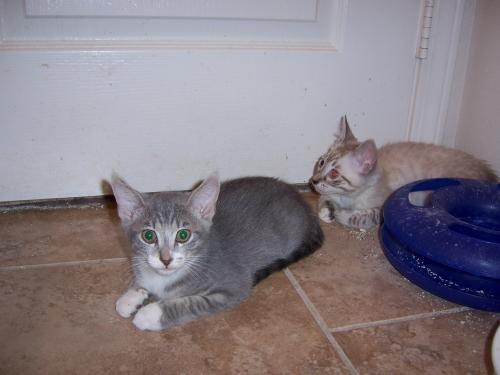

In [ ]:
img1=cv2.imread('/content/microsoft-catsvsdogs-dataset/PetImages/Cat/7500.jpg')
cv2_imshow(img1)

In [ ]:
# Standard library imports
import os
import shutil
import random

# Data handling
import numpy as np
import pandas as pd

# Machine Learning and Neural Network libraries
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Add, MaxPooling2D, Dense, BatchNormalization, Input, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Visualization libraries
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# SciPy and Sklearn for additional functionalities
import scipy as sp
from scipy import ndimage
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [ ]:
cat_file_path = '/content/microsoft-catsvsdogs-dataset/PetImages/Cat'
dog_file_path = '/content/microsoft-catsvsdogs-dataset/PetImages/Dog'

In [ ]:
# Data Splitting Function
def split_data(main_dir, split_size=0.9):
    files = []
    for file in os.listdir(main_dir):
        if  os.path.getsize(os.path.join(main_dir, file)): # check if the file's size isn't 0
            files.append(file) # appends file name to a list

    shuffled_files = random.sample(files, len(files)) # shuffles the data
    split = int(split_size * len(shuffled_files)) # the training split casted into int for numeric rounding
    train_files = shuffled_files[:split] # training split
    split_valid_test = int(split + (len(shuffled_files) - split) / 2)

    validation_files = shuffled_files[split:split_valid_test] # validation split
    test_files = shuffled_files[split_valid_test:]

    return train_files, validation_files, test_files

# Split the data for cats and dogs
train_cats, val_cats, test_cats = split_data(cat_file_path)
train_dogs, val_dogs, test_dogs = split_data(dog_file_path)

print("Cats - Training:", len(train_cats), "Validation:", len(val_cats), "Test:", len(test_cats))
print("Dogs - Training:", len(train_dogs), "Validation:", len(val_dogs), "Test:", len(test_dogs))

Cats - Training: 11250 Validation: 625 Test: 625
Dogs - Training: 11250 Validation: 625 Test: 625


In [ ]:
# Function to create a dataframe from file names and labels
def create_dataframe(file_names, label, main_dir):
    return pd.DataFrame({
        'filename': [os.path.join(main_dir, fname) for fname in file_names],
        'class': label
    })

# Create dataframes
train_df = pd.concat([create_dataframe(train_cats, 'cat', cat_file_path), create_dataframe(train_dogs, 'dog', dog_file_path)])
val_df = pd.concat([create_dataframe(val_cats, 'cat', cat_file_path), create_dataframe(val_dogs, 'dog', dog_file_path)])
test_df = pd.concat([create_dataframe(test_cats, 'cat', cat_file_path), create_dataframe(test_dogs, 'dog', dog_file_path)])

# Shuffle the dataframes
train_df = train_df.sample(frac=1).reset_index(drop=True)
val_df = val_df.sample(frac=1).reset_index(drop=True)
test_df = test_df.sample(frac=1).reset_index(drop=True)

In [ ]:
# Image Data Generators

# Includes rescaling to normalize the image data. This transformation
# converts pixel values from the range [0, 255] to [0, 1], aiding in model training.
train_gen = ImageDataGenerator(rescale=1./255)
validation_gen =  ImageDataGenerator(rescale=1./255.)
test_gen =  ImageDataGenerator(rescale=1./255.)

In [ ]:
# Data Generators from Dataframes
train_generator = train_gen.flow_from_dataframe(dataframe=train_df, x_col='filename', y_col='class', target_size=(150, 150), batch_size=64, class_mode='binary')
validation_generator = validation_gen.flow_from_dataframe(dataframe=val_df, x_col='filename', y_col='class', target_size=(150, 150), batch_size=64, class_mode='binary')
test_generator = test_gen.flow_from_dataframe(dataframe=test_df, x_col='filename', y_col='class', target_size=(150, 150), batch_size=64, class_mode='binary')

Found 22499 validated image filenames belonging to 2 classes.
Found 1250 validated image filenames belonging to 2 classes.
Found 1249 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


In [ ]:
# Function to Plot Data
class_names = ['Cat', 'Dog']
def plot_data(generator, n_images):
    """
    Plots random data from dataset
    Args:
    generator: a generator instance
    n_images : number of images to plot
    """
    i = 1
    images, labels = generator.next()
    labels = labels.astype('int32')

    plt.figure(figsize=(14, 15))

    for image, label in zip(images, labels):
        plt.subplot(4, 3, i)
        plt.imshow(image)
        plt.title(class_names[label])
        plt.axis('off')
        i += 1
        if i == n_images:
            break
    plt.show()

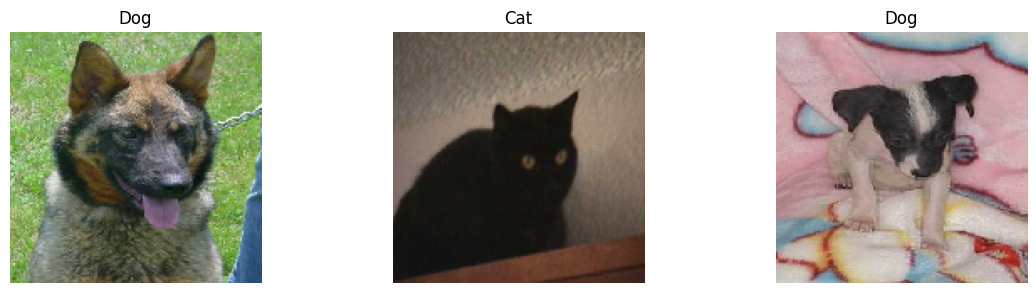

In [ ]:
# Plotting Train Data Samples
plot_data(train_generator, 4)

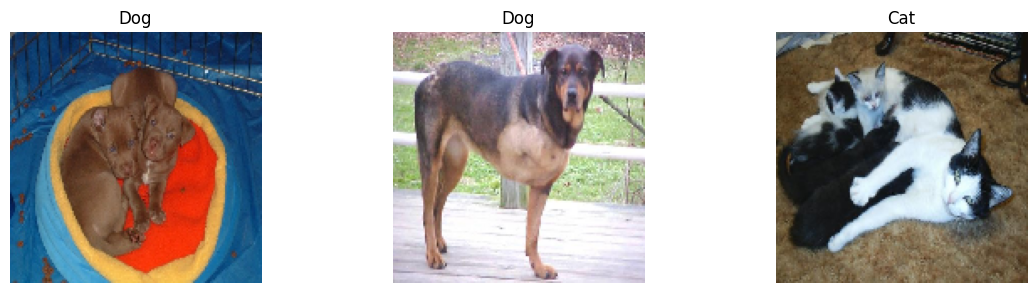

In [ ]:
# Plotting Validation Data Samples
plot_data(validation_generator, 4)